## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [3]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text[0] = ' ' + text[0]
text = ' '.join(text).lower().replace('\n', '')

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [ ]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

text = [x.replace('\t\t', '') for x in text]

--2024-12-14 10:03:13--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt’

onegin.txt          100%[===================>] 256.37K  --.-KB/s    in 0.03s   

2024-12-14 10:03:13 (9.89 MB/s) - ‘onegin.txt’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text[0] = ' ' + text[0]
text = ' '.join(text).lower().replace('\n', '')


TypeError: 'str' object does not support item assignment

Put all the characters, that you've seen in the text, into variable `tokens`.

In [4]:
tokens = sorted(set(text))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [5]:
# dict <index>:<char>
# Your great code here
# Словарь: символ - индекс
token_to_idx = {char: idx for idx, char in enumerate(tokens)}

# Your great code here
#Словарь: индекс - символ
idx_to_char = {idx: char for idx, char in enumerate(tokens)}

print("Tokens:", tokens)
print("Token to index:", token_to_idx)
print("Index to token:", idx_to_char)

Tokens: [' ', '!', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Token to index: {' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36}
Index to token: {0: ' ', 1: '!', 2: "'", 3: '(', 4: ')', 5: ',', 6: '-', 7: '.', 8: ':', 9: ';', 10: '?', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z'}


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

In [6]:
import numpy as np

# размер словаря
vocab_size = len(tokens)

# Преобразование текста в матрицу one-hot encoding
def one_hot_encode(text, vocab_size):
    one_hot_matrix = np.zeros((len(text), vocab_size), dtype=np.float32)
    for i, char in enumerate(text):
      # Заполняем единицей позицию вектора соответствующего символа
        one_hot_matrix[i, token_to_idx[char]] = 1
    return one_hot_matrix

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [7]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Your code here
class VanillaRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(VanillaRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

embedding_size = 64
hidden_size = 128
learning_rate = 0.001
vocab_size = len(tokens)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VanillaRNN(vocab_size, embedding_size, hidden_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [8]:
EPOCHS = 40
BATCH_SIZE = 2048
sequence_length = 100

In [9]:
# Подготовка данных для обучения
class TextDataset(Dataset):
    def __init__(self, text, char_to_idx, seq_len):
        self.text = text
        self.char_to_idx = char_to_idx
        self.seq_len = seq_len
        self.data = [char_to_idx[ch] for ch in text]

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len]
        y = self.data[idx + 1:idx + self.seq_len + 1]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

dataset = TextDataset(text, token_to_idx, sequence_length)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [10]:
#Для хранения значения потерь
loss_history = []

#запуск обучения
for epoch in range(EPOCHS):
    hidden = None
    total_loss = 0
    for i, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Инициализация скрытого состояния для текущего батча
        hidden = torch.zeros(1, inputs.size(0), hidden_size).to(device)

        optimizer.zero_grad()
        outputs, hidden = model(inputs, hidden)

        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {avg_loss:.4f}")

torch.save(model, 'vRNN.pth')

Epoch [1/40], Loss: 2.7595
Epoch [2/40], Loss: 2.2608
Epoch [3/40], Loss: 2.0545
Epoch [4/40], Loss: 1.9293
Epoch [5/40], Loss: 1.8430
Epoch [6/40], Loss: 1.7762
Epoch [7/40], Loss: 1.7212
Epoch [8/40], Loss: 1.6747
Epoch [9/40], Loss: 1.6350
Epoch [10/40], Loss: 1.6007
Epoch [11/40], Loss: 1.5704
Epoch [12/40], Loss: 1.5436
Epoch [13/40], Loss: 1.5195
Epoch [14/40], Loss: 1.4978
Epoch [15/40], Loss: 1.4782
Epoch [16/40], Loss: 1.4601
Epoch [17/40], Loss: 1.4434
Epoch [18/40], Loss: 1.4279
Epoch [19/40], Loss: 1.4134
Epoch [20/40], Loss: 1.4000
Epoch [21/40], Loss: 1.3872
Epoch [22/40], Loss: 1.3752
Epoch [23/40], Loss: 1.3639
Epoch [24/40], Loss: 1.3531
Epoch [25/40], Loss: 1.3429
Epoch [26/40], Loss: 1.3334
Epoch [27/40], Loss: 1.3240
Epoch [28/40], Loss: 1.3154
Epoch [29/40], Loss: 1.3069
Epoch [30/40], Loss: 1.2991
Epoch [31/40], Loss: 1.2915
Epoch [32/40], Loss: 1.2845
Epoch [33/40], Loss: 1.2778
Epoch [34/40], Loss: 1.2714
Epoch [35/40], Loss: 1.2654
Epoch [36/40], Loss: 1.2600
E

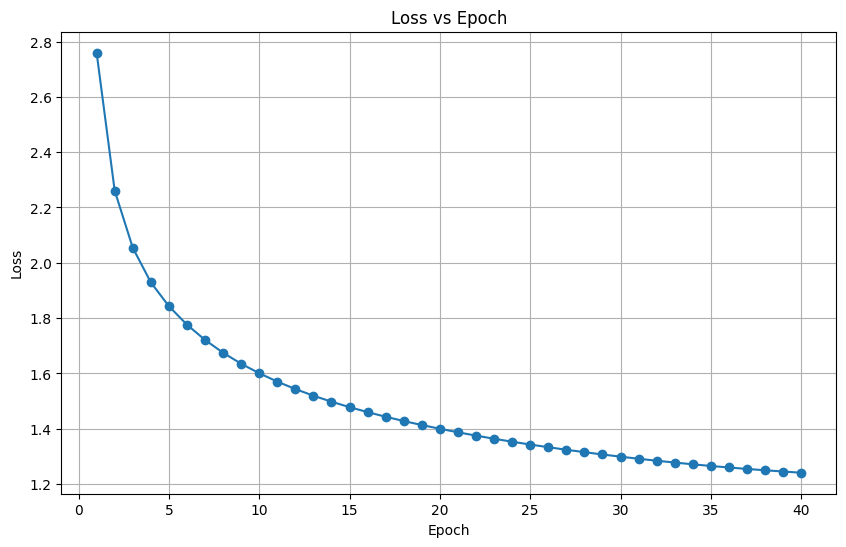

In [12]:
# Your plot code here
import matplotlib.pyplot as plt

# Визуализация функции потерь
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), loss_history, marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [13]:
model = torch.load('vRNN.pth', weights_only=False)

In [14]:
import torch.nn.functional as F

def generate_text(model, start_text, length, temperature = 1.0):
    model.eval()
    input_text = torch.tensor([token_to_idx[ch] for ch in start_text], dtype=torch.long).unsqueeze(0).to(device)
    hidden = None
    generated_text = start_text

    with torch.no_grad():
        for _ in range(length):
            output, hidden = model(input_text, hidden)
            next_char_idx = torch.argmax(output[:, -1, :]).item()
            next_char = idx_to_char[next_char_idx]
            generated_text += next_char
            input_text = torch.tensor([[next_char_idx]], dtype=torch.long).to(device)

    return generated_text

In [15]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

start_text = "the cat goes home on friday"  # Replace with your own starting sequence
print(generate_text(model, start_text, 500, 0.2))

the cat goes home on friday doth lie,   and the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that i am some eyes were but the world that 


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [16]:
# Your beautiful code here
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

In [17]:
# Инициализация LSTM model
lstm_model = LSTMModel(vocab_size, embedding_size, hidden_size).to(device)

# Функция потерь и optimizer для LSTM
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Для хранения функции потерь
lstm_loss_history = []
# запуск обучения для LSTM
for epoch in range(EPOCHS):
    total_loss = 0

    for i, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        batch_size = inputs.size(0)

        hidden = (torch.zeros(1, batch_size, hidden_size).to(device),
              torch.zeros(1, batch_size, hidden_size).to(device))  # LSTM hidden state (h, c)

        if hidden is None or hidden[0].size(1) != batch_size:
            # Повторно инициализируйте скрытое состояние, если это первый пакет или изменяется размер пакета
            hidden = (
                torch.zeros(1, batch_size, hidden_size).to(device),
                torch.zeros(1, batch_size, hidden_size).to(device)
            )
        else:
            # Detach скрытого состояния от графика вычислений, чтобы предотвратить повторный просмотр истории
            hidden = tuple(h.detach() for h in hidden)


        optimizer.zero_grad()
        outputs, hidden = lstm_model(inputs, hidden)
        hidden = tuple([h.detach() for h in hidden])  # Detach скрытого состояния, чтобы предотвратить повторный просмотр истории

        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    lstm_loss_history.append(avg_loss)
    print(f"LSTM Epoch [{epoch+1}/{EPOCHS}], Loss: {avg_loss:.4f}")

LSTM Epoch [1/40], Loss: 2.8978
LSTM Epoch [2/40], Loss: 2.3608
LSTM Epoch [3/40], Loss: 2.1142
LSTM Epoch [4/40], Loss: 1.9593
LSTM Epoch [5/40], Loss: 1.8520
LSTM Epoch [6/40], Loss: 1.7757
LSTM Epoch [7/40], Loss: 1.7168
LSTM Epoch [8/40], Loss: 1.6686
LSTM Epoch [9/40], Loss: 1.6275
LSTM Epoch [10/40], Loss: 1.5913
LSTM Epoch [11/40], Loss: 1.5590
LSTM Epoch [12/40], Loss: 1.5298
LSTM Epoch [13/40], Loss: 1.5029
LSTM Epoch [14/40], Loss: 1.4777
LSTM Epoch [15/40], Loss: 1.4537
LSTM Epoch [16/40], Loss: 1.4311
LSTM Epoch [17/40], Loss: 1.4099
LSTM Epoch [18/40], Loss: 1.3899
LSTM Epoch [19/40], Loss: 1.3709
LSTM Epoch [20/40], Loss: 1.3523
LSTM Epoch [21/40], Loss: 1.3346
LSTM Epoch [22/40], Loss: 1.3171
LSTM Epoch [23/40], Loss: 1.3003
LSTM Epoch [24/40], Loss: 1.2839
LSTM Epoch [25/40], Loss: 1.2678
LSTM Epoch [26/40], Loss: 1.2520
LSTM Epoch [27/40], Loss: 1.2366
LSTM Epoch [28/40], Loss: 1.2216
LSTM Epoch [29/40], Loss: 1.2070
LSTM Epoch [30/40], Loss: 1.1927
LSTM Epoch [31/40],

In [18]:
torch.save(model, 'LTSM.pth')

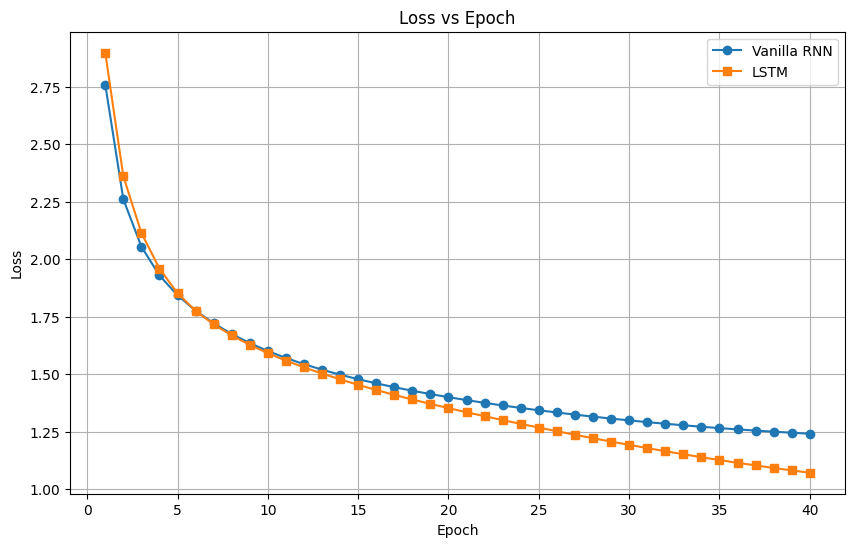

In [19]:
import matplotlib.pyplot as plt
# Визуализация функции потерь для Vanilla RNN и LSTM
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), loss_history, marker='o', label='Vanilla RNN')
plt.plot(range(1, EPOCHS + 1), lstm_loss_history, marker='s', label='LSTM')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Vanilla RNN:

1) Страдает от проблемы затухающих или взрывающихся градиентов, из-за чего плохо обучается на длинных последовательностях.

2) Ограничена в моделировании долгосрочных зависимостей.

# LSTM:

1) Решает проблему затухающих градиентов благодаря механизму гейтов и прямому переносу информации через ячейки памяти.

2) Эффективно работает с длинными последовательностями.

# Скорость вычислений и ресурсы:

1) Vanilla RNN:

Легче и быстрее обучается, так как у нее меньше параметров и простая структура.
Подходит для задач, где важна скорость и последовательности короткие.

2) LSTM:

Более ресурсоемкая из-за сложной структуры (гейты, ячейки памяти).
Замедляется на больших наборах данных, но часто оправдана для сложных задач.

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [20]:
import torch.nn.functional as F
# Функция для генерации текста с различными значениями temperature
def generate_text_with_temperature(model, start_text, length, temperature):
    model.eval()
    input_text = torch.tensor([token_to_idx[ch] for ch in start_text], dtype=torch.long).unsqueeze(0).to(device)
    hidden = (torch.zeros(1, 1, hidden_size).to(device), torch.zeros(1, 1, hidden_size).to(device))  # For LSTM
    generated_text = start_text

    with torch.no_grad():
        for _ in range(length):
            output, hidden = model(input_text, hidden)
            output = output[:, -1, :]  # Focus на последнем символе в последовательности

            # масштабирование temperature
            scaled_logits = output / temperature
            probabilities = F.softmax(scaled_logits, dim=-1).cpu().numpy().flatten()

            # Нормализация вероятности (при необходимости) и выбор следующего символа
            probabilities /= probabilities.sum()
            next_char_idx = np.random.choice(len(probabilities), p=probabilities)
            next_char = idx_to_char[next_char_idx]

            generated_text += next_char
            input_text = torch.tensor([[next_char_idx]], dtype=torch.long).to(device)

    return generated_text

In [21]:
start_text = "to be or not to be"
length = 200  # Длина генерируемого текста

for temp in [0.1, 0.2, 0.5, 1.0, 2.0]:
    print(f"--- Temperature: {temp} ---")
    generated_text = generate_text_with_temperature(lstm_model, start_text, length, temp)
    print(generated_text)
    print("\n")

--- Temperature: 0.1 ---
to be or not to be such some fair,   and there i am some intery the better stand age,   the world and the world and the spends of such a say the world come to dear love,   that thou to the world is the spend   the worl


--- Temperature: 0.2 ---
to be or not to be sun,   and strange so soor love's say so such a say the worthy newer fair,   and there i am some interest in the world and make the seat,   which think the strangely parts of thee that the strength o


--- Temperature: 0.5 ---
to be or not to be subscroak.    xxix    that is my love you desert so see.    cxxxvii    so thou art my heart there is the worth, when thou art when thou dost true more,     for i to the frowns of their grows,     and


--- Temperature: 1.0 ---
to be or not to be;     i amaning a glasion fires with thy love, stright,   and hath he life.    lxviii    but thou hast in hope, advair forwings,   of thy am macking time for love's gone.   much now,     but as fair b


--- Temperature:

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [25]:
# Saving and loading code here
torch.save(model, 'model.pth')
print('Модель сохранена в файл: model.pth')

# Загрузка модели
model_loaded = torch.load('model.pth', weights_only=False)
model_loaded.eval()  # Переводим модель в режим оценки
print('Модель загружена и переведена в режим оценки')
print()
# Генерация текста загруженной моделью
seed_text = "to be or not to be"
print(generate_text_with_temperature(model, seed_text, length=200, temperature=0.5))

Модель сохранена в файл: model.pth
Модель загружена и переведена в режим оценки

to be or not to be strain'd,   and i am thine own self are shape, i self-sumest thy mony;   but doth says in him all many,   and this with this cherse of thy self too are sait,   though that is thy love and thine,   as


### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)